# INFO 371 - Problem Set 4

Due: December 1 2024, 11:59 PM

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the "YOUR NAME HERE" text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Trevor Tang

Collaborators: 

## Introduction to the assignment

For this problem set, you will detect the language of a text using image recognition. The aim of this problem set is let you practice with convolutional neural networks and to give you a better understanding of how the network structure affects model capabilities and training time.

The data for this problem set is comparatively large compared to data we've used thus far. Accordingly, it's recommended to build and test in small batches before attempting to work on the entirety of the data. It may also be useful to work on this problem set in chunks - don't overwrite the outputs every time you need to run new code. Lastly, remember that if you would like additional computational power, you can use the JupyterHub available for the class or a google Colab instance (log in with your UW NetID).

Your task is to develop machine learning models to distinguish between languages in images of text. The data is contained in the `ps3_imgs` folder and split into training and test data. The training and test data contain the following: 

| Language            | Abbr    | Train images | Test images |
| :------------------ | :-----: | ----:        | ----: |
| Danish text images  | DA      | 3841         | 1273  |
| English text images | EN      | 7892         | 2600  |
| Russian text images | RU      | 6229         | 1975  |
| Thai text images    | TH      | 7006         | 2318  |
| Chinese text images | ZH      | 5032         | 1670  |

The files are named as SOURCE_LANG-xxx.jpg. SOURCE refers to the source text (e.g. author and book name), LANG is language (DA: Danish, EN: English, RU: Russian, TH: Thai, ZN: Chinese), and xxx refers to alphabetically ordered chunk id. The images are mostly around 256x256 pixels. All images are grayscale only, and all text is printed in about the same point size.

For all models, you must only use attributes of the images in your predictions - you cannot use attributes of the file (i.e. the file name) as a feature in any model.

## Part 1: Descriptive analysis

### 1.1 Examine the data

Start by visually examining the images across each language. What the similarities? What are the differences? Which languages will be easy to distinguish? Which will be the hardest set(s) of languages to distinguish?

#### Similarities

- All photos show text from novels. They also have similar format: black text on a white background with each line of text separated by a fix length

#### Differences

- Some pages contain titles of chapters which are all capitalized (EN, DA, RU). 
- There are some pages where the text is centralized and not in typical book page text format (DA, RU).

The easiest languages to distinguish are Chinese and Thai because they have many characters that are not similar to the other languages (i.e., the English alphabet). The hardest languages to distinguish are English and Danish because they share a similar alphabet. The middleground is Russian since while they do share some of the alphabet with English and Danish, they have their own unique set of alphabetic characters and typescript (i.e., the height of their capital letters that are akin to the English alphabet).

### 1.2 Create extract_lang

Create a function named `extract_lang` that accepts a filename for an image file as a string and returns the two letter abbreviation for the language in the image. It should not take in the path to the file - only the filename. Test your function by passing in the following strings:

"THIS-SHOULD-NOT-BE-RETURNED_EN-THIS-SHOULD-NOT-BE-RETURNED.jpg" should return "EN"

"aakjaer-samlede-verker-1_DA-aaa.jpg" should return "DA"

"novel_00089_TH-acw.jpg" should return "TH"

In [1]:
import regex as re

In [2]:
def extract_lang(filename):
    return re.findall(r'[A-Z]+', filename)[0] # Return all capitalized letters since the only capitalized letters are the language tag

In [3]:
extract_lang("aakjaer-samlede-verker-1_DA-aaa.jpg"), extract_lang("novel_00089_TH-acw.jpg")

('DA', 'TH')

### 1.3 Create DataFrames

This problem set will have several subsets of datasets you will work with. For reference and consistency, they will be referred to as such:

- `training data`: this is the data in the `ps3_imgs/train/` folder
- `test data`: this is the data in the `ps3_imgs/test/` folder
- `subset data`: this is the subset you will create in 1.4
- `subset training data`: this is the training data produced by a train-test split of the `subset data`
- `subset validation data`: this is the test data produced by a train-test split of the `subset data`

For this step, extract the list of filenames (without folder paths) in the training data and the test data. Store these as variables that may be helpful later. Then, using your `extract_lang` function, create corresponding lists of the languages in the training and test data. Also store these as variables that may be helpful later. Finally, create two DataFrames - one for each of the training and test data - that contain two columns: filename (which corresponds to the name of the file) and language (which corresponds to the language in the file). Note that you don't have to actually import the data in the files - we'll do that later. For now, just work with the filenames.

Show the heads of both created DataFrames.

In [4]:
import os
import pandas as pd

In [5]:
test_dir_path = './ps3_imgs/test'
train_dir_path = './ps3_imgs/train'

test_data_filesnames = pd.Series(os.listdir(test_dir_path))
train_data_filesnames = pd.Series(os.listdir(train_dir_path))

test_data_languages = test_data_filesnames.apply(extract_lang)
train_data_languages = train_data_filesnames.apply(extract_lang)

training_df = pd.DataFrame({'filename': train_data_filesnames,  'language': train_data_languages})
testing_df= pd.DataFrame({'filename': test_data_filesnames,  'language': test_data_languages})

training_df.head(), testing_df.head()

(                               filename language
 0                    dracula_EN-asd.jpg       EN
 1               chinese-laws_ZN-frt.jpg       ZN
 2               chinese-laws_ZN-dik.jpg       ZN
 3  lin-huang-tien-fei-hsieng_ZN-aac.jpg       ZN
 4               chinese-laws_ZN-fqo.jpg       ZN,
                               filename language
 0  aakjaer-samlede-verker-2_DA-boo.jpg       DA
 1           ling-chu-ko-pai_ZN-bna.jpg       ZN
 2     tolstoy-voina-i-mir-3_RU-ajn.jpg       RU
 3               novel_00072_TH-abi.jpg       TH
 4  aakjaer-samlede-verker-3_DA-aoa.jpg       DA)

### 1.4 Create subset data

There are 30,000 images in the training data. Randomly select 5,000 of them (you do not need to import the images yet - just select the filenames) for your subset data. Be sure to set a seed for reproducibility. Then, for your subset data, again have three variables: a list of filenames, a list of languages, and a DataFrame with the filename and corresponding language (as you did for the training and test data in 1.3).

Show that you have 5,000 images in your subset data and that the split of languages across the subset data is comparable to the split of languages across the training data and the test data.

In [6]:
training_subset_filenames_df = train_data_filesnames.sample(5000, random_state=11)
training_subset_languages_df = training_subset_filenames_df.apply(extract_lang)
training_subset_df = pd.DataFrame({'filename': training_subset_filenames_df, 'language': training_subset_languages_df})
training_subset_df.shape

(5000, 2)

In [7]:
training_subset_df.head()

,filename,language
16131,aakjaer-samlede-verker-3_DA-bbo.jpg,DA
22502,novel_00063_TH-aan.jpg,TH
9281,claudes-confession_EN-aia.jpg,EN
20513,novel_00084_TH-abn.jpg,TH
12395,aakjaer-samlede-verker-3_DA-bwv.jpg,DA


### 1.5 Create mappings

Later, we will be using the two-letter language abbreviations as inputs to our convolutional neural network models. These models, however, will output integers (not strings) that map to the input strings. To prepare for this, create a mapping dictionary that has 5 values, one for each of the langauges in the dataset. The keys of the dictionary should be numerical values from 0-4 and the values should be the language abbreviations in alphabetical order (i.e. 'DA' comes first alphabetically and should have a key of 0; 'ZH' comes last alphabetically and should have a key of 4). 

Do not write the dictionary entries manually - instead compute them using your variables/data. Print your mapping dictionary when complete.

In [8]:
unique_languages = pd.Series(train_data_languages.unique()).sort_values(ascending=True, ignore_index=True)
languages_map = unique_languages.to_dict()
languages_map

{0: 'DA', 1: 'EN', 2: 'RU', 3: 'TH', 4: 'ZN'}

## Part 2 - Predictions Using Sklearn

For this part, you will make predictions on your subset data using three classifiers: logistic regression, random forests, and a multilayer perceptron.

### 2.1 Create load_img_file

To begin, we are going to create a wrapper for the `load_img` function from tensorflow. You can read the documentation on the function [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img). Your function should be called `load_img_file` and should accept a path to an image file. It should then call the `load_img` file with the following arguments and return the output:
- color_mode = 'grayscale'
- target_size = (100, 100)
- interpolation = 'nearest'
- keep_aspect_ratio = False

Note that we're rescaling our images to 100x100 here. This is to help our computers process the data. If you're comfortable with a larger file size, go up to (but not more than) 224x224.

Test that your function works by passing `load_img_file` a path to a file from the subset data and see that it displays a visible image.

In [9]:
from tensorflow.keras.utils import load_img
import numpy as np

In [10]:
def load_img_file(filepath):
    return load_img(f'./ps3_imgs/train/{filepath}', color_mode='grayscale', target_size=(100, 100), interpolation='nearest', keep_aspect_ratio=False)

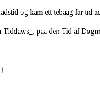

In [11]:
load_img_file(training_subset_df['filename'].iloc[0])

### 2.2 Load/resize images

Use your `load_img_file` function to load the images in the subset data. [Reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)  each output of `load_img_file` to be a numpy array with 10,000 values (corresponding to your 100x100 image). Store the resultant image data vectors in a list or array. Thus, your list/array should have 5,000 values (one for each image in the subset data) with each entry being a 10,000x1 numpy array of the pixel data.

In [12]:
subset_images = training_subset_df['filename'].apply(load_img_file)
subset_images = subset_images.apply(np.array)
subset_images.shape

(5000,)

In [13]:
subset_images.iloc[0].shape

(100, 100)

In [14]:
subset_images = subset_images.apply(lambda x: x.reshape(10000))
subset_images.iloc[0].shape

(10000,)

### 2.3 Fit standard libraries

Create an 80/20 train-test split of the image data from 2.2. Be sure to set a random seed. Then, fit three models on the subset training data: logistic regression, random forests, and multilayer perceptron. You do not need to tune hyperparameters for this step. How do the models perform "out of the box" on the subset training data? What about on the subset test data?

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 

import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(subset_images, training_subset_df['language'], train_size=0.8, random_state=11)
X_train = X_train.to_list()
X_test = X_test.to_list()
len(X_train), len(X_test)

(4000, 1000)

In [17]:
clf_rf = RandomForestClassifier()
clf_lr = LogisticRegression()
clf_mlp = MLPClassifier()

In [18]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
clf_lr.fit(X_train, y_train) # Usually does not converge

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
clf_mlp.fit(X_train, y_train)

MLPClassifier()

In [21]:
lr_preds_training = clf_lr.predict(X_train)
rf_preds_training = clf_rf.predict(X_train)
mlp_preds_training = clf_mlp.predict(X_train)

In [22]:
print("Logistic Regression:", accuracy_score(y_train, lr_preds_training))
print("Random Forest:", accuracy_score(y_train, rf_preds_training))
print("MLP:", accuracy_score(y_train, mlp_preds_training))

Logistic Regression: 0.98275
Random Forest: 1.0
MLP: 0.2635


In [23]:
lr_preds_test = clf_lr.predict(X_test)
rf_preds_test = clf_rf.predict(X_test)
mlp_preds_test = clf_mlp.predict(X_test)

In [24]:
print("Logistic Regression:", accuracy_score(y_test, lr_preds_test))
print("Random Forest:", accuracy_score(y_test, rf_preds_test))
print("MLP:", accuracy_score(y_test, mlp_preds_test))

Logistic Regression: 0.822
Random Forest: 0.857
MLP: 0.25


The models perform well on the training data, but that might be because of overfitting. We have near perfect accuracy on both logistic regression and random forest, and somewhat plausible accuracy on our MLP model. 

As for our test data, the accuracy is lower than our training data, but it is quite high nonetheless. I am curious to see how tuning our hyperparameters for each model will affect the accuracy scores.

### 2.4 Confusion matrices

What do the confusion matrices on the subset training data and subset test data look like for your best-performing model? Which language(s) does the model perform well on? Which language(s) does it struggle on? Does this align with your expectations from 1.1?

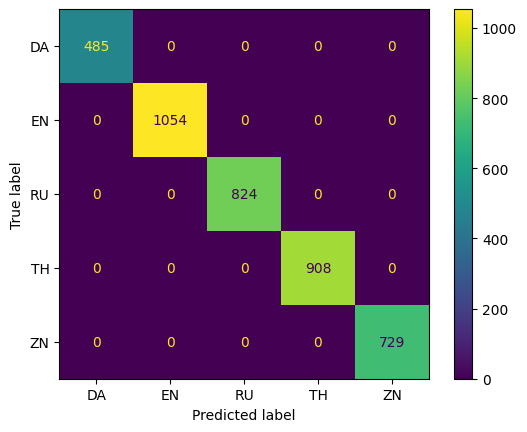

In [25]:
# Best performing model is Random Forest
rf_cm = confusion_matrix(y_train, rf_preds_training)
disp = ConfusionMatrixDisplay(rf_cm, display_labels=['DA', 'EN', 'RU', 'TH', 'ZN'])
disp.plot()
plt.show()

The confusion matrix for our training set has a perfect diagonal, but that is because our accuracy for random forests using our training data was 100%. As such, each language is predicted well and there are no struggles in this model. As such, we cannot use this confusion matrix to determine how well our model is doing.

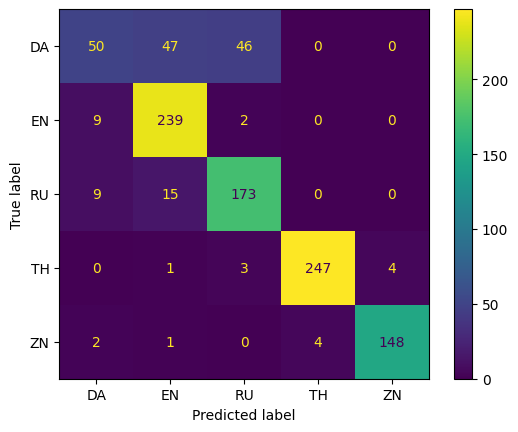

In [26]:
rf_cm = confusion_matrix(y_test, rf_preds_test, labels=['DA', 'EN', 'RU', 'TH', 'ZN'])
disp = ConfusionMatrixDisplay(rf_cm, display_labels=['DA', 'EN', 'RU', 'TH', 'ZN'])
disp.plot()
plt.show()


In [27]:
# Calculate proportions of correct predictions for each language in our test dataset
print("DA:", 53 / 485)
print("EN:", 237 / 1054)
print("RU:", 173 / 824)
print("TH:", 247 / 908)
print("ZN:", 148 / 729)

DA: 0.10927835051546392
EN: 0.22485768500948766
RU: 0.2099514563106796
TH: 0.2720264317180617
ZN: 0.2030178326474623


As for our test data, we can see that there are more false positives / negatives. In terms of the model, the best performing languages were Thai and somewhat English, while the worse performing was Danish. While my expectations for Thai were correct, I was surprised that Danish did much worse than English since their alphabets are really similar. Similarly, I was surprised to see Chinese in 4th place as I thought the characters were unique enough for our model to distinguish them.

### 2.5 Optimize hyperparameters

Now optimize hyperparameters for your models. Use 3-fold cross validation for tuning. For logistic regression, optimize the regularization strength. For random forests, optimize both the max depth and minimum samples per leaf. For the multilayer perceptron, optimize the number of nodes and layers.

Note: A grid search may be appropriate for the logistic regression and random forest hyperparameters. For the multilayer perceptron, it's suggested to use a random search until you find an architecture that improves model performance - just find something that works reasonably well.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [29]:
params_lr = {'C' : [0, 0.01, 0.1, 1, 10]}

In [30]:
grid_search = GridSearchCV(clf_lr, 
                           param_grid = params_lr, 
                           cv = 3, verbose = 10, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 2/3; 1/5] START C=0.........................................................
[CV 2/3; 1/5] END ............................C=0;, score=nan total time=   0.0s
[CV 1/3; 1/5] START C=0.........................................................
[CV 1/3; 1/5] END ............................C=0;, score=nan total time=   0.0s
[CV 3/3; 1/5] START C=0.........................................................
[CV 3/3; 1/5] END ............................C=0;, score=nan total time=   0.0s
[CV 1/3; 2/5] START C=0.01......................................................
[CV 3/3; 3/5] START C=0.1.......................................................
[CV 2/3; 2/5] START C=0.01......................................................
[CV 1/3; 4/5] START C=1.........................................................
[CV 3/3; 2/5] START C=0.01......................................................
[CV 1/3; 3/5] START C=0.1........................

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 3/5] END ........................C=0.1;, score=0.842 total time=  14.1s
[CV 3/3; 4/5] START C=1.........................................................


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 1/3; 4/5] END ..........................C=1;, score=0.828 total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/3; 3/5] END ........................C=0.1;, score=0.837 total time=  14.2s
[CV 1/3; 2/5] END .......................C=0.01;, score=0.839 total time=  15.0s
[CV 1/3; 5/5] START C=10........................................................
[CV 3/3; 2/5] END .......................C=0.01;, score=0.836 total time=  14.8s
[CV 2/3; 2/5] END .......................C=0.01;, score=0.828 total time=  15.0s
[CV 2/3; 5/5] START C=10........................................................
[CV 1/3; 3/5] END ........................C=0.1;, score=0.828 total time=  14.8s
[CV 2/3; 4/5] END ..........................C=1;, score=0.832 total time=  14.7s
[CV 3/3; 5/5] START C=10........................................................


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[CV 2/3; 5/5] END .........................C=10;, score=0.837 total time=   9.2s
[CV 3/3; 4/5] END ..........................C=1;, score=0.840 total time=  10.1s
[CV 1/3; 5/5] END .........................C=10;, score=0.829 total time=   9.5s
[CV 3/3; 5/5] END .........................C=10;, score=0.839 total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 0.01, 0.1, 1, 10]}, verbose=10)

In [31]:
lr_params = grid_search.best_params_
lr_params

{'C': 0.1}

For Logistic Regression, the best parameter for our regularization strength came out to be when C = 0.1. It took around 13 minutes for our grid search to give us this value, but only 1 minute and 30 seconds when we use 7 cores running in parallel.

In [32]:
params_rf = {'max_depth' : [None, 1, 2, 5, 10],
             'min_samples_leaf' : [1, 0.01, 0.05, 0.1, 0.5]}

In [33]:
grid_search = GridSearchCV(clf_rf, 
                           param_grid = params_rf, 
                           cv = 3, verbose = 10, n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3; 1/25] START max_depth=None, min_samples_leaf=1.........................
[CV 2/3; 1/25] START max_depth=None, min_samples_leaf=1.........................
[CV 3/3; 1/25] START max_depth=None, min_samples_leaf=1.........................
[CV 1/3; 2/25] START max_depth=None, min_samples_leaf=0.01......................
[CV 2/3; 2/25] START max_depth=None, min_samples_leaf=0.01......................
[CV 3/3; 2/25] START max_depth=None, min_samples_leaf=0.01......................
[CV 1/3; 3/25] START max_depth=None, min_samples_leaf=0.05......................
[CV 2/3; 3/25] START max_depth=None, min_samples_leaf=0.05......................
[CV 1/3; 3/25] END max_depth=None, min_samples_leaf=0.05;, score=0.780 total time=   2.7s
[CV 3/3; 3/25] START max_depth=None, min_samples_leaf=0.05......................
[CV 2/3; 3/25] END max_depth=None, min_samples_leaf=0.05;, score=0.794 total time=   2.8s
[CV 1/3; 4/25] START max_depth

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 5, 10],
                         'min_samples_leaf': [1, 0.01, 0.05, 0.1, 0.5]},
             verbose=10)

In [34]:
rf_params = grid_search.best_params_
rf_params

{'max_depth': None, 'min_samples_leaf': 1}

The best parameters for our random forest model are where max_depth is 'None' and min_samples_leaf is equal to 1. The grid search process took around 1 minute to run, but with 7 cores it took about 25 seconds!

In [35]:
params_mlp = {'hidden_layer_sizes': [
        (np.random.randint(1, 100),),
        (np.random.randint(1, 100), np.random.randint(1, 100)),
        (np.random.randint(1, 100), np.random.randint(1, 100), np.random.randint(1, 100)),
]}

In [36]:
random_search = RandomizedSearchCV(clf_mlp, param_distributions=params_mlp, cv=3, verbose=10, scoring='accuracy', n_jobs=-1, random_state = 11)

random_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START hidden_layer_sizes=(43,)....................................
[CV 2/3; 1/3] START hidden_layer_sizes=(43,)....................................
[CV 3/3; 1/3] START hidden_layer_sizes=(43,)....................................
[CV 1/3; 2/3] START hidden_layer_sizes=(23, 46).................................
[CV 2/3; 2/3] START hidden_layer_sizes=(23, 46).................................
[CV 3/3; 2/3] START hidden_layer_sizes=(23, 46).................................
[CV 1/3; 3/3] START hidden_layer_sizes=(22, 16, 6)..............................
[CV 2/3; 3/3] START hidden_layer_sizes=(22, 16, 6)..............................
[CV 3/3; 1/3] END .....hidden_layer_sizes=(43,);, score=0.711 total time=  12.0s
[CV 3/3; 3/3] START hidden_layer_sizes=(22, 16, 6)..............................
[CV 3/3; 2/3] END ..hidden_layer_sizes=(23, 46);, score=0.264 total time=  15.0s
[CV 2/3; 2/3] END ..hidden_layer_sizes=(23, 46);, 

RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'hidden_layer_sizes': [(43,), (23, 46),
                                                               (22, 16, 6)]},
                   random_state=11, scoring='accuracy', verbose=10)

In [37]:
mlp_params = random_search.best_params_
mlp_params

{'hidden_layer_sizes': (23, 46)}

The best number of hidden layers are 2 with a respective number of nodes of (42, 35). This took around 3 minutes and 34 seconds to run, but on 7 cores it only took around 3 minutes to run.

### 2.6 Show updated results

Show your model performance for all three tuned models on the subset training and subset test data. Have the models improved from out of the box? If so, to what extent?

In [90]:
# Logistic Regression
clf_lr = LogisticRegression(**lr_params)
clf_rf = RandomForestClassifier(**rf_params)
clf_mlp = MLPClassifier(**mlp_params)

In [66]:
clf_lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [67]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
clf_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(23, 46))

In [69]:
lr_preds_training = clf_lr.predict(X_train)
rf_preds_training = clf_rf.predict(X_train)
mlp_preds_training = clf_mlp.predict(X_train)

In [70]:
print("Logistic Regression:", accuracy_score(y_train, lr_preds_training))
print("Random Forest:", accuracy_score(y_train, rf_preds_training))
print("MLP:", accuracy_score(y_train, mlp_preds_training))

Logistic Regression: 0.9825
Random Forest: 1.0
MLP: 0.2635


In [71]:
lr_preds_test = clf_lr.predict(X_test)
rf_preds_test = clf_rf.predict(X_test)
mlp_preds_test = clf_mlp.predict(X_test)

In [72]:
print("Logistic Regression:", accuracy_score(y_test, lr_preds_test))
print("Random Forest:", accuracy_score(y_test, rf_preds_test))
print("MLP:", accuracy_score(y_test, mlp_preds_test))

Logistic Regression: 0.834
Random Forest: 0.858
MLP: 0.25


For logistic regression, both our training and test data fit slightly better, but not by a lot (< 1%).

For random forest, the training data accuracy stayed the same, but our training data accuracy decreased slightly by about 1%

Finally, for MLP, our training and testing data decreased slightly, but this makes sense since we did a random search rather than grid search which means that it is possible that the best parameters for number of nodes and layers might have been passed over. As such, I expect the accuracy to vary due to this randomness.

## Part 3 - Convolutional Net (Subset)

### 3.1 Create generators

The cell below contains a template for a keras [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) object (note that the ImageDataGenerator object in keras has been recently deprecated but it should still work for our purposes). This ImageDataGenerator object takes in an image, rescales the values, and adds some random shifting. Then, `flow_from_dataframe` is called which takes in a DataFrame of files and labels (i.e. languages) and passes them on. For this step, get the `subset_generator` variable working below by replacing the dataframe reference with your `subset_df` from 1.4 and replacing the path reference to the location of the files in the subset (most likely your training folder). Once running correctly, you should see a message like: _Found 5000 validated image filenames belonging to 5 classes._

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
subset_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.25,
    height_shift_range=0.25
).flow_from_dataframe(
    training_subset_df,
    './ps3_imgs/train',
    x_col='filename', y_col='language',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    batch_size = 16
)

Found 5000 validated image filenames belonging to 5 classes.


### 3.2 Create generators

Create four more generator objects by copying the subset_generator above along with the call to `flow_from_dataframe`. Make the appropriate adjustments to the DataFrame and path references as needed. The four generator objects should be:
- **subset_generator_no_shuf**: this should be identical to your working subset_generator above with two key exceptions: `flow_from_dataframe` should NOT shuffle your data and the ImageDataGenerator should not have any `width_shift_range` or `height_shift_range` arguments.
- **training_generator**: this should be identical to your working subset generator above but should use your training_df from 1.3 instead of your subset_df.
- **training_generator_no_shuf**: this should be identical to your training_generator above with two key exceptions: `flow_from_dataframe` should NOT shuffle your data and the ImageDataGenerator should not have any `width_shift_range` or `height_shift_range` arguments.
- **test_generator**: this should be identical to your working training_generator_no_shuf above but should use your test_df from 1.3 instead of your training_df. `flow_from_dataframe` should not shuffle and should not have any `width_shift_range` or `height_shift_range` arguments.

We will be using the `subset_generator_no_shuf`, `training_generator_no_shuf`, and `test_generator` objects for evaluation. We will use the generator objects with shuffling for training.

In [48]:
subset_generator_no_shuf = ImageDataGenerator(
    rescale=1./255
).flow_from_dataframe(
    training_subset_df,
    './ps3_imgs/train',
    x_col='filename', y_col='language',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    batch_size = 16
)

Found 5000 validated image filenames belonging to 5 classes.


In [49]:
training_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.25,
    height_shift_range=0.25
).flow_from_dataframe(
    training_df,
    './ps3_imgs/train',
    x_col='filename', y_col='language',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    batch_size = 16
)

Found 30000 validated image filenames belonging to 5 classes.


In [50]:
training_generator_no_shuf = ImageDataGenerator(
    rescale=1./255,
).flow_from_dataframe(
    training_df,
    './ps3_imgs/train',
    x_col='filename', y_col='language',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    batch_size = 16
)

Found 30000 validated image filenames belonging to 5 classes.


In [51]:
test_generator = ImageDataGenerator(
    rescale=1./255,
).flow_from_dataframe(
    testing_df,
    './ps3_imgs/test',
    x_col='filename', y_col='language',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    batch_size = 16
)

Found 9836 validated image filenames belonging to 5 classes.


### 3.3 Construct model

Construct a neural network model using keras and fit it to the subset data using the `subset_generator`. Tweak and change your network architecture until you achieve **at least 85% accuracy** on both the subset data and the training data (i.e. about in line with the models from part 2). Use the `model.predict` function on the `subset_generator_no_shuf` and `training_generator_no_shuf` to get accuracy estimates. As stated earlier, you may use only the data in the image files to build this model - you cannot use the file attributes. That said, you are free to use whatever architecture you'd like.

You do not need to do any hyperparameter tuning here but be sure to run the model for a sufficient number of epochs during training and see how it performs. It is suggested to have at least one layer of convolution, pooling, (batch) normalization, and activation (the orders of these will be up to you). Multiple convolutional and pooling layers should also improve performance at the expense of training time. Be sure to also add dropout and it may help to have a dense layer right before the final activation layer. Feel free to also change the batch size in the `subset_generator` or to use multiple batch sizes. Note that this step may take a lot of trial and error - that's OK. Just be sure to give yourself sufficient time and don't watch your code as it runs as it may take a while. For more help with where to start and layers to add, see the following:

- [A guide to an efficient way to build NN architectures](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)
- [An example in TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)
- [A Survey of the Recent Architectures of CNNs](https://arxiv.org/abs/1901.06032)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [111]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1))) # Our image size is 224 x 224 and we have 1 input channel for greyscale
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax')) # 5 languages
model.add(Dropout(0.5))


In [112]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,954,277 (45.60 MB)

 Trainable params: 11,954,277 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
history = model.fit(subset_generator, epochs=20, 
                    validation_data=subset_generator_no_shuf)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3267 - loss: nan

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.3269 - loss: nan - val_accuracy: 0.7530 - val_loss: 0.5449
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - accuracy: 0.4327 - loss: nan - val_accuracy: 0.8480 - val_loss: 0.4280
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.4397 - loss: nan - val_accuracy: 0.8446 - val_loss: 0.4183
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 169ms/step - accuracy: 0.4571 - loss: nan - val_accuracy: 0.8302 - val_loss: 0.4444
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 169ms/step - accuracy: 0.4477 - loss: nan - val_accuracy: 0.8346 - val_loss: 0.4280
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.4613 - loss: nan - val_accuracy: 0.8356 - val_loss: 0.4563
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 173ms/step - accuracy: 0.4439 - loss: nan - val_accuracy: 0.8700 - val_loss: 0.3715
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 177ms/step - accuracy: 0.4584 - loss: nan - val_accuracy: 0.8628 - val_

### 3.4 Describe model

Describe the model you ultimately built. What layers are included and what steps? What guided your approach when building the model? What was your reasoning for adding the layers you did?

### 3.5 Evaluate model

Evaluate your model using the `test_generator`. How does it perform on the test data vs the subset and training data? Is there a large/small difference? What do you attribute the extent of this difference to?

## Part 4: Retrain model

Next, we will train your new model on the entirety of the training data. 

### 4.1 Train on training data

Now, train your designed model on the entirety of the training data using the `training_generator`. Note that this may take some time. You may also need to increase the number of epochs compared to part 3 because of the larger dataset. Be sure to give yourself enough time for this step.

### 4.2 Make predictions

Evaluate the model against the subset data, training data, and test data (again, be sure to use the `no_shuf` generators for evaluation on the subset and training data). How does your model do? How does that compare to the model trained on only the subset data?

### 4.3 Analyze results

Examine the confusion matrix for your predictions on the test set. Where does your model do well? Where does it struggle?

Hint: your model will likely output a probabililty for each class. You'll have to find the index of the maximum value (numpy has a function for this) and then map this to a character value using your mapping dictionary.